In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.api import SimpleExpSmoothing

In [15]:
raw_data = pd.read_csv('./datasets/TSLA.csv')
raw_data.head()

df = raw_data.loc[:,['Date', 'Close']]
df.head()

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002


In [30]:
X = df

train_size = int(len(X) * 0.80)

X_train, X_test = X[0:train_size], X[train_size:len(X)]


# X_train= X_train.to_numpy()
# X_test = X_test.to_numpy()


X_train.shape

(606, 2)

In [32]:
#fit model
model = SimpleExpSmoothing(X_train['Close'])

In [33]:
model_fit = model.fit()

In [34]:
predict = model_fit.forecast(len(X_test['Close']))

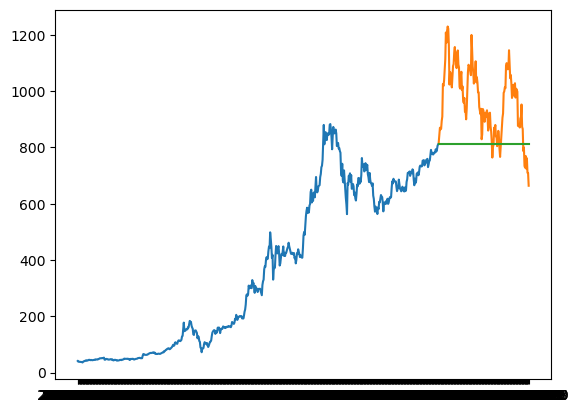

In [38]:

plt.plot(X_train['Date'], X_train['Close'])

plt.plot(X_test['Date'], X_test['Close'])
plt.plot(X_test['Date'], predict)


In [40]:
model_fit.summary()

Dep. Variable:,Close,No. Observations:,606
Model:,SimpleExpSmoothing,SSE,164205.145
Optimized:,True,AIC,3398.807
Trend:,None,BIC,3407.621
Seasonal:,None,AICC,3398.874
Seasonal Periods:,None,Date:,"Fri, 05 Jul 2024"
Box-Cox:,False,Time:,19:25:07
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9297319,alpha,True
initial_level,40.844749,l.0,True
